# Linear Reservoir
Establishing relationship between rainfall and runoff is useful in practice. A runoff model is a mathematical model describing the rainfall–runoff relations of a rainfall catchment area, drainage basin or watershed. More precisely, it produces a surface runoff hydrograph in response to a rainfall event, represented by and input as a hyetograph. In other words, the model calculates the conversion of rainfall into runoff. More details can be found in this [link](https://en.wikipedia.org/wiki/Runoff_model_(reservoir)). The **linear reservoir** is one of the most well known runoff models. 

In this package, we can：
* Use linear resevoir model to simulate runoff.
* Show the intermediate process of calculation.
* Visualize the result and process.

In [20]:
from hydrology import Runoff as rof
from hydrology.Runoff import LinearResevoirModel

The most concise way to use the linear resevoir model is as follow.

In [28]:
# you should provide excess rainfall, which equals to rainfall minus initial loss and continuous loss.
excessRainfall = [0, 10, 20, 5, 0]
# create linear resevoir model
lrm = LinearResevoirModel(excessRainfall=excessRainfall,
                        k=14102, area=24, baseflow=10)
runoff = lrm.runoff(maxTime=25, digits=1)
# You can achieve longer simulation by assigning a larger `maxTime`
runoff # # print runoff 

[Runoff]
Time	Value
0	10
1	17.5
2	38.5
3	50.9
4	45.4
5	37.4
6	31.2
7	26.4
8	22.7
9	19.8
10	17.6
11	15.9
12	14.5
13	13.5
14	12.7
15	12.1
16	11.6
17	11.3
18	11.0
19	10.8
20	10.6
21	10.5
22	10.3
23	10.3
24	10.2

You can also visualize the result.

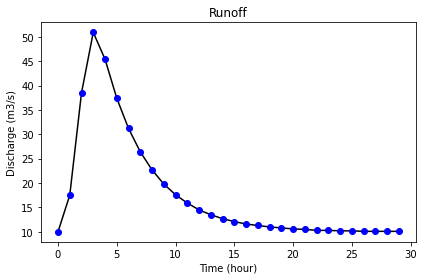

In [22]:
runoff.plot()

Although the above code achieve a whole linear resevoir model, you should also understand the intermediate process, which includes:
* Convert rainfall unit from depth to flow
* Compute direct runoff by solving linear resevoir equation
* Compute storage by linear relationship
* Combine direct runoff and base flow to get total runoff

Convert rainfall unit from depth to flow.

In [23]:
lrm.excess_rainfall_in_flow()

[Excess Rainfall (m^3/s)]
Time	Value
0	0.0
1	66.66666666666667
2	133.33333333333334
3	33.333333333333336
4	0.0

Compute direct runoff by solving linear resevoir equation.

In [24]:
runoffDirect, storages = lrm.direct_runoff(maxTime=25)
runoffDirect

[Runoff]
Time	Value
0	0
1	7.546220601182243
2	28.476519043877744
3	40.895367707067294
4	35.41031401913859
5	27.39389278477191
6	21.192282042401214
7	16.39463298236824
8	12.68310746755717
9	9.811821661796523
10	7.59055653901527
11	5.872156115140601
12	4.542778551657632
13	3.5143542788638023
14	2.718751499093353
15	2.103262541934752
16	1.6271120482254635
17	1.2587556544629388
18	0.9737902189160529
19	0.7533371445796303
20	0.582791696177752
21	0.4508554550609171
22	0.3487878133668345
23	0.2698269198867311
24	0.20874171603864705

Compute storage by linear relationship.

In [25]:
storages

[Storage]
Time	Value
0	0
1	106416.80291787199
2	401575.87155676394
3	576706.475405063
4	499356.2482978924
5	386308.6760508535
6	298853.5613619419
7	231197.11431735693
8	178857.18150749122
9	138366.30907465456
10	107042.02831319334
11	82809.14553571276
12	64062.26313547592
13	49559.42404053734
14	38339.83364021446
15	29660.208366363873
16	22945.534104075487
17	17750.972239236362
18	13732.389667154177
19	10623.560412861947
20	8218.528499498658
21	6357.963627269053
22	4918.6057440991
23	3805.0992242426814
24	2943.6756795770007

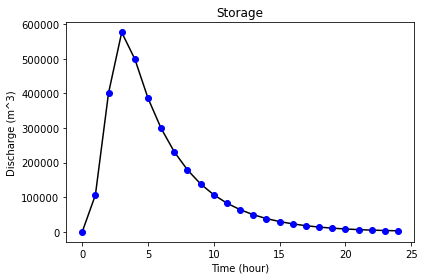

In [27]:
storages.plot()